In [243]:
#import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [267]:
df=pd.read_csv(r'C:\Users\hp\Downloads\youtube project\youtubecleaned.csv')

In [268]:
df

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,genre
0,0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,748374,57527,2966,15954,False,False,False,People & Blogs
1,1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,2418783,97185,6146,12703,False,False,False,Entertainment
2,2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,3191434,146033,5339,8181,False,False,False,Comedy
3,3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,343168,10172,666,2146,False,False,False,Entertainment
4,4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,2095731,132235,1989,17518,False,False,False,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04+00:00,1685609,38160,1385,2657,False,False,False,Pets & Animals
40945,40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18 01:00:06+00:00,1064798,60008,382,3936,False,False,False,People & Blogs
40946,40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22+00:00,1066451,48068,1032,3992,False,False,False,Entertainment
40947,40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04+00:00,5660813,192957,2846,13088,False,False,False,Film & Animation


In [269]:
df.iloc[8319]

Unnamed: 0                                     8319
video_id                                _lUiJsnGXh8
trending_date                            2017-12-25
title                     Honest Trailers - Jumanji
channel_title                        Screen Junkies
category_id                                       1
publish_time              2017-12-19 18:00:04+00:00
views                                       1675844
likes                                         40908
dislikes                                       1163
comment_count                                  4557
comments_disabled                             False
ratings_disabled                              False
video_error_or_removed                        False
genre                              Film & Animation
Name: 8319, dtype: object

In [247]:
df.columns

Index(['Unnamed: 0', 'video_id', 'trending_date', 'title', 'channel_title',
       'category_id', 'publish_time', 'views', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'genre'],
      dtype='object')

In [248]:
le=LabelEncoder()
df['genre']=le.fit_transform(df['genre'])

In [249]:
df['comments_disabled']=le.fit_transform(df['comments_disabled'])
df['ratings_disabled']=le.fit_transform(df['ratings_disabled'])
df['video_error_or_removed']=le.fit_transform(df['video_error_or_removed'])


In [250]:
df

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,genre
0,0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,748374,57527,2966,15954,0,0,0,10
1,1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,2418783,97185,6146,12703,0,0,0,3
2,2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,3191434,146033,5339,8181,0,0,0,1
3,3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,343168,10172,666,2146,0,0,0,3
4,4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,2095731,132235,1989,17518,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04+00:00,1685609,38160,1385,2657,0,0,0,11
40945,40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18 01:00:06+00:00,1064798,60008,382,3936,0,0,0,10
40946,40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22+00:00,1066451,48068,1032,3992,0,0,0,3
40947,40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04+00:00,5660813,192957,2846,13088,0,0,0,4


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              40949 non-null  int64 
 1   video_id                40949 non-null  object
 2   trending_date           40949 non-null  object
 3   title                   40949 non-null  object
 4   channel_title           40949 non-null  object
 5   category_id             40949 non-null  int64 
 6   publish_time            40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  comments_disabled       40949 non-null  int64 
 12  ratings_disabled        40949 non-null  int64 
 13  video_error_or_removed  40949 non-null  int64 
 14  genre                   40949 non-null  int32 
dtypes:

In [252]:
lst=df.select_dtypes('int')


<Axes: >

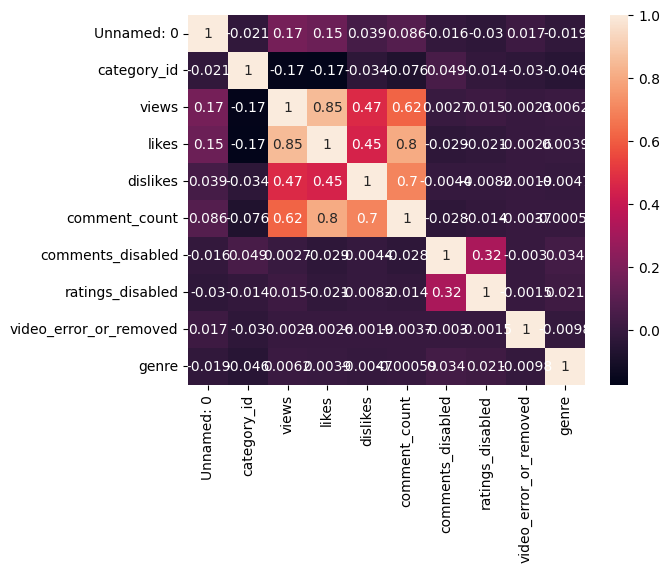

In [253]:
sns.heatmap(lst.corr(),annot=True)

In [254]:
X=df.drop(columns=['Unnamed: 0','video_id','title','channel_title','category_id','likes','trending_date','publish_time'])
X

,views,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,genre
0,748374,2966,15954,0,0,0,10
1,2418783,6146,12703,0,0,0,3
2,3191434,5339,8181,0,0,0,1
3,343168,666,2146,0,0,0,3
4,2095731,1989,17518,0,0,0,3
...,...,...,...,...,...,...,...
40944,1685609,1385,2657,0,0,0,11
40945,1064798,382,3936,0,0,0,10
40946,1066451,1032,3992,0,0,0,3
40947,5660813,2846,13088,0,0,0,4


In [255]:
df.iloc[8319]

Unnamed: 0                                     8319
video_id                                _lUiJsnGXh8
trending_date                            2017-12-25
title                     Honest Trailers - Jumanji
channel_title                        Screen Junkies
category_id                                       1
publish_time              2017-12-19 18:00:04+00:00
views                                       1675844
likes                                         40908
dislikes                                       1163
comment_count                                  4557
comments_disabled                                 0
ratings_disabled                                  0
video_error_or_removed                            0
genre                                             4
Name: 8319, dtype: object

In [256]:
y=df['likes']

In [257]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [258]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [259]:
ypred=model.predict(x_test)

In [260]:
y_pred=np.round(ypred).astype(int)
y_pred

array([ 52823, 389956, 115560, ..., 113202,   8035,  47760])

In [261]:
model.score(x_test,y_test)

0.8846521408614707

In [262]:
import pickle
with open('model.pickle','wb') as model_file:
    pickle.dump(model,model_file)

In [263]:
with open('model.pickle','rb') as mod:
    model=pickle.load(mod)

In [264]:
x_test

,views,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,genre
8319,1675844,1163,4557,0,0,0,4
8679,21344664,137707,72303,0,0,0,7
30645,1138884,926,23424,0,0,0,1
777,704,2,5,0,0,0,14
5386,9947,1,6,0,0,0,3
...,...,...,...,...,...,...,...
10767,9521,19,61,0,0,0,10
26439,5080694,2670,1610,0,0,0,4
11551,1768870,2585,20691,0,0,0,7
9048,62469,773,346,0,0,0,10


In [265]:
model.predict([[1675844,1163,4557,0,0,0,4]])

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([52822.57578344])